# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

ALL PHOTOS FOR Q1 WORK ARE IN THE ASSIGNMENT FOLDER

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

4. Since the median is the middle of the dataset, it should always be the middle. If a non-decreasing transformation was performed on all of the data, which includes the median, then everything should be altered to the same degree. In that case, since the median is just a point in the data, performing an individual transformation or a transformation of the data would yield the same result, that being half of the data below and half of the data above (since everything was shifted to the same degree). This logic applies to any quantile, the IQR, and the range. For all of these properties, the math is looking at the relationship between the numbers in the dataset. As long as the relationship between the numbers stays the same (i.e. as long as every number is transformed to the same degree), then these properties will remain the same.

5. Yes, it is always true that m(g(X))=g(m(X)). As proved in question 1, a the final mean of a transformed dataset can either be found by transforming all of the data (m(bx)) or by transforming the mean (b(m(x))). This is because the mean is looking at the relationship between the numbers in the dataset, and the multiplier can be applied before or after to get the result, so yes it is always true.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

99999999


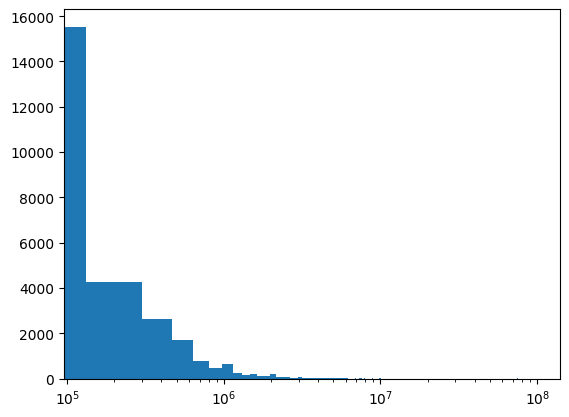

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import requests
file = "https://raw.githubusercontent.com/RyanErm/EDA/refs/heads/main/assignment/data/ForeignGifts_edu.csv"
df = pd.read_csv(file)


plt.hist(df["Foreign Gift Amount"], bins =600)

plt.xscale('log')
print(df["Foreign Gift Amount"].max())



The variable has an extremely large range, making it difficult to graph/visualize. A majority of the values seem to have a price of less than 10 million, but there are some outliers to this that are skewing the data. Overall it seems that most people have a relativly small gift price range, with a large sum being less than a million dollars. Again, it is hard to visualize on a graph due to the large range.

In [2]:
df['Gift Type'].value_counts(normalize=True)

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


The proportion of gifts that are contracts is 0.612, the proportion that are monetary is 0.386, and the proportion that are real estate is 0.000390.

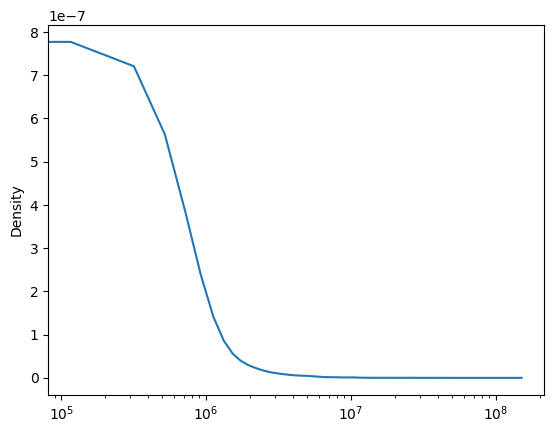

In [4]:
df["Foreign Gift Amount"].plot.density()
plt.xscale("log")
plt.show()

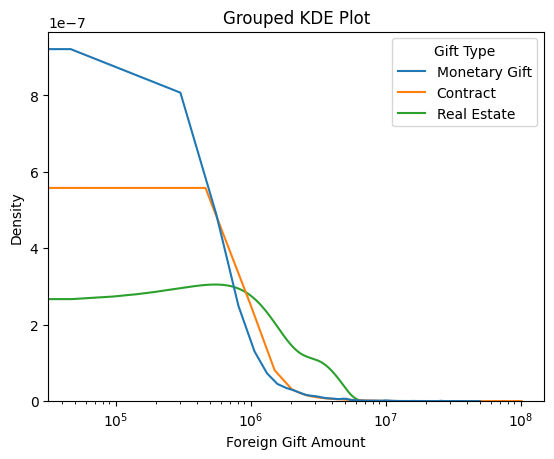

In [5]:
sns.kdeplot( data=df, x="Foreign Gift Amount", hue="Gift Type", common_norm=False).set(title='Grouped KDE Plot')
plt.xscale("log")
plt.show()

Some basic patterns


*   There is a higher density of monetary gifts, but they sharply decline at a certain dollar amount
*   The lowest density is that of real estate, they they tend to have a higher price associated with it


*   The amount of contracts sharply declines once they reach a certain price
*   There is a very clear pattern in the relative density of gift types, with there being the most of monetary, then contracts, then real estate.
*   For the non-grouped KDE plot, there is a sharp decline in the gift price at a certain for any type of gift





In [34]:

result = df.groupby(["Country of Giftor"]).count()
nresult = result.sort_values(by='ID', ascending=False, inplace=False)
print(nresult.head(15))


                     ID  OPEID  Institution Name  City  State  \
Country of Giftor                                               
ENGLAND            3655   3655              3655  3655   3655   
CHINA              2461   2461              2461  2461   2461   
CANADA             2344   2344              2344  2344   2344   
JAPAN              1896   1896              1896  1896   1896   
SWITZERLAND        1676   1676              1676  1676   1676   
SAUDI ARABIA       1610   1610              1610  1610   1610   
FRANCE             1437   1437              1437  1437   1437   
GERMANY            1394   1394              1394  1394   1394   
HONG KONG          1080   1080              1080  1080   1080   
SOUTH KOREA         811    811               811   811    811   
QATAR               693    693               693   693    693   
THE NETHERLANDS     512    512               512   512    512   
KOREA               452    452               452   452    452   
INDIA               434  

The top 15 countries in terms of the amount of gifts given are:


ENGLAND                     
CHINA                       
CANADA                      
JAPAN                       
SWITZERLAND                 
SAUDI ARABIA                
FRANCE                      
GERMANY                     
HONG KONG                    
SOUTH KOREA                  
QATAR                        
THE NETHERLANDS              
KOREA                        
INDIA                        
TAIWAN                       

In [22]:
result1 = df.groupby(['Country of Giftor']).sum()
result1 = result1.sort_values(by='Foreign Gift Amount', ascending=False, inplace=False)
print(result1.head(15))

                            ID      OPEID  \
Country of Giftor                           
QATAR                 14133760  207860000   
ENGLAND               47713393  861644700   
CHINA                 33468243  601615400   
SAUDI ARABIA          20193035  355691800   
BERMUDA                2126107   31117600   
CANADA                28437385  499182200   
HONG KONG             14000547  244471700   
JAPAN                 22888812  475343200   
SWITZERLAND           29044550  482048700   
INDIA                  7209712  202901000   
GERMANY               18986157  340566200   
UNITED ARAB EMIRATES   5232842   93984000   
FRANCE                17333036  310430000   
SINGAPORE              6067534  111142100   
AUSTRALIA              3895412   66743300   

                                                       Institution Name  \
Country of Giftor                                                         
QATAR                 Arizona State UniversityArizona State Universi...   
ENGLAND  

The top 15 countries in terms of gift amount are:


QATAR                                                 
ENGLAND                                              
CHINA                                                
SAUDI ARABIA                                          
BERMUDA                                                 
CANADA                                                
HONG KONG                                              
JAPAN                                                  
SWITZERLAND                                            
INDIA                                                  
GERMANY                                                
UNITED ARAB EMIRATES                                   
FRANCE                                                 
SINGAPORE                                              
AUSTRALIA                                            


In [35]:
result3 = df.groupby(['Institution Name']).sum()
result3 = result3.sort_values(by='Foreign Gift Received Date', ascending=False, inplace=False)
print(result3.head(15))


                                                   ID      OPEID  \
Institution Name                                                   
University of California, Los Angeles        27261234  514954000   
California Institute of Technology            5405571  282976200   
Columbia University in the City of New York  21254093  305078900   
Ohio State University (The)                  22516377  313326000   
Johns Hopkins University                     12880872  186722300   
University of Michigan - Ann Arbor           12297285  166237500   
Stanford University                           2748486   87174000   
Cornell University                           12905892  177028300   
University of Pennsylvania                   14863125  211125000   
Massachusetts Institute of Technology         9477579  126759600   
Yale University                               5857775   78430000   
Harvard University                            7137015   97621500   
University of Colorado Denver                119

The top 15 institutions that receive the most money are:


University of California, Los Angeles                            
California Institute of Technology                               
Columbia University in the City of New York                       
Ohio State University (The)                                       
Johns Hopkins University                                          
University of Michigan - Ann Arbor                                
Stanford University                                               
Cornell University                                                
University of Pennsylvania                                        
Massachusetts Institute of Technology                             
Yale University                                                   
Harvard University                                                
University of Colorado Denver                                     
University of Chicago (The)                                       
Arizona State University                                        

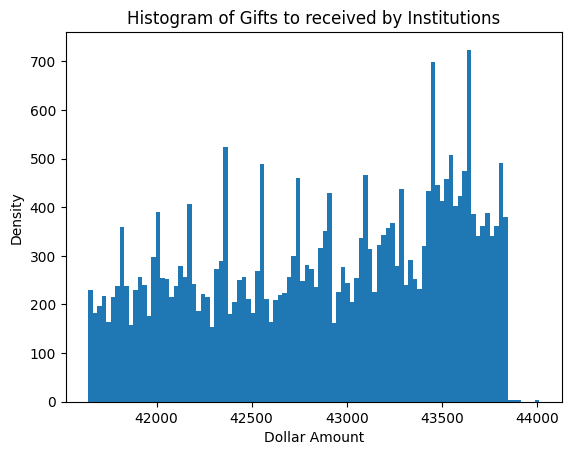

In [28]:
plt.hist(df["Foreign Gift Received Date"], bins =100)
plt.ylabel("Density")
plt.xlabel("Dollar Amount")
plt.title("Histogram of Gifts to received by Institutions")
plt.show()

The top 5 giftors that provide the most money are:

QATAR                                                 
ENGLAND                                              
CHINA                                                
SAUDI ARABIA                                          
BERMUDA

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [62]:
oil_data = pd.read_csv("https://raw.githubusercontent.com/RyanErm/EDA/refs/heads/main/assignment/data/drilling_rigs.csv")
print(oil_data.shape)

(623, 10)


There are 623 observations and 10 variables

In [65]:
#print(oil_data)
print(oil_data.dtypes)

Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                                    

There are multiple columns that should be numeric, but will not be read as such due to the presence of the string "Not Available". These cells will need to be typecast to "NAN"s, or in other words blanks. Doing so will allow the column to be counted as a numeric, as there wont be strings mixed in.

Conciely, the data should be cleaned by coercing all columns to numeric and coercing any strings to "NAN"s.



In [67]:
oil_data['time'] = pd.to_datetime(oil_data['Month'], format='mixed')
print(oil_data["time"])

0     1973-01-01
1     1973-02-01
2     1973-03-01
3     1973-04-01
4     1973-05-01
         ...    
618   2024-07-01
619   2024-08-01
620   2024-09-01
621   2024-10-01
622   2024-11-01
Name: time, Length: 623, dtype: datetime64[ns]


In [70]:
oil_data['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(oil_data['Active Well Service Rig Count (Number of Rigs)'], errors = "coerce")
print(oil_data["Active Well Service Rig Count (Number of Rigs)"])

0      1549.0
1      1677.0
2      1805.0
3      1898.0
4      1991.0
        ...  
618       NaN
619       NaN
620       NaN
621       NaN
622       NaN
Name: Active Well Service Rig Count (Number of Rigs), Length: 623, dtype: float64


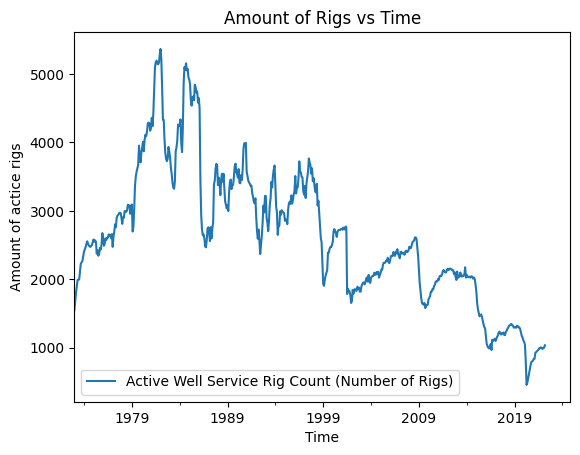

In [74]:
oil_data.plot("time", "Active Well Service Rig Count (Number of Rigs)")
plt.ylabel("Amount of actice rigs")
plt.xlabel("Time")
plt.title("Amount of Rigs vs Time")
plt.show()

The amount of rigs has decreased overall during this period. In this period there has also been a massive increase, and then a slow subsequent decline. This decline was not constant, but rather the amount declined, jumped up again, and then went down lower, leaving a net loss of active rigs.

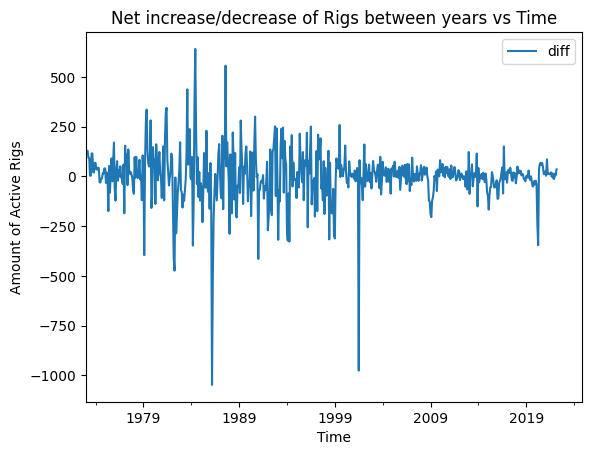

In [78]:
oil_data['diff'] = oil_data['Active Well Service Rig Count (Number of Rigs)'].diff()
oil_data.plot("time", "diff")
plt.ylabel("Amount of Active Rigs")
plt.xlabel("Time")
plt.title("Net increase/decrease of Rigs between years vs Time")
plt.show()

This plot shows the net change in the amount of rigs from year to year. At the beginning of the timeline the size of the net change is moderate, but during the mid 80's there are large increases and decreases in the amounts of oil rigs. By the year 200 and onward the net change of oil rigs is relativly stable, most likely due to a decrease in oil availbility or environmental protection laws.

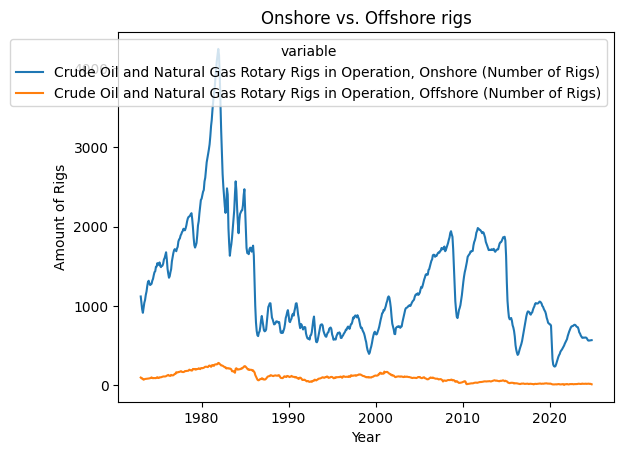

In [97]:
new_oil_data = oil_data[["time", "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)", "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"]]

new_oil = new_oil_data.melt(id_vars='time')


plot = sns.lineplot(data=new_oil,x='time',y='value',hue='variable')
plot.set(title='Onshore vs. Offshore rigs',xlabel='Year',ylabel='Amount of Rigs')
plt.show()
